In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
import tak as tw

In [4]:
X,df = tw.data.pnc.load_connectome()

In [5]:
df.head(n=10)

,bblid,race,ethnicity,sex,age,edu,fedu,medu,handedness,dxpmrv4_diagnosis,dxpmrv4_diagnosis_num,medical_rating
0,080010,1,2,Male,21.7500,14.0,20.0,16.0,1,TD,1,2
1,080199,5,1,Male,20.3333,12.0,NaN,12.0,1,PS-L,3,1
2,080208,2,2,Male,20.5000,11.0,12.0,12.0,2,PS-L,3,2
3,080249,1,2,Female,20.8333,16.0,10.0,12.0,1,TD,1,2
4,080265,2,2,Female,20.5000,12.0,12.0,16.0,2,OP,2,0
5,080425,2,2,Female,20.0000,12.0,14.0,12.0,2,OP,2,0
6,080498,2,2,Male,20.9167,14.0,15.0,16.0,1,PS,4,1
7,080537,1,2,Female,20.9167,14.0,15.0,12.0,1,TD,1,2
8,080557,2,2,Female,21.5000,15.0,12.0,12.0,1,TD,1,0
9,080575,1,2,Male,21.7500,16.0,20.0,20.0,1,OP,2,0


In [6]:
df.isnull().sum()

bblid                     0
race                      0
ethnicity                 0
sex                       0
age                       0
edu                       0
fedu                     82
medu                     11
handedness                0
dxpmrv4_diagnosis         0
dxpmrv4_diagnosis_num     0
medical_rating            0
dtype: int64

# Handle nan values

In [7]:
# use median fill for nans
df.fedu.fillna( df.fedu.median() ,inplace=True)
df.medu.fillna( df.medu.median() ,inplace=True)

In [8]:
df.isnull().sum()

bblid                    0
race                     0
ethnicity                0
sex                      0
age                      0
edu                      0
fedu                     0
medu                     0
handedness               0
dxpmrv4_diagnosis        0
dxpmrv4_diagnosis_num    0
medical_rating           0
dtype: int64

In [9]:
df.columns

Index([u'bblid', u'race', u'ethnicity', u'sex', u'age', u'edu', u'fedu',
       u'medu', u'handedness', u'dxpmrv4_diagnosis', u'dxpmrv4_diagnosis_num',
       u'medical_rating'],
      dtype='object')

# Create histogram of numeric scores
See if they are matched in gender

In [10]:
options = dict(rug=True, kde=True)
scores = ['age','edu','fedu','medu']

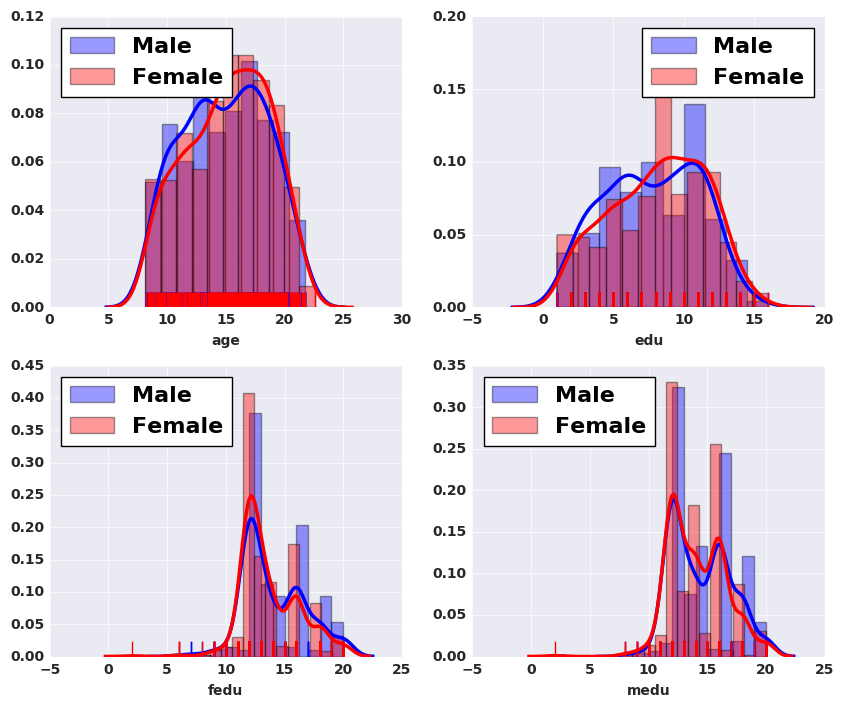

In [11]:
# temporarily change axes style
with sns.axes_style('darkgrid'):
    fig,axes = plt.subplots(2,2)
    axes = axes.ravel()

for i, score in enumerate(scores):
    sns.distplot(df[ df['sex'] == 'Male'][score],label='Male',ax=axes[i],**options)
    sns.distplot(df[ df['sex'] == 'Female'][score],color='red',label='Female',ax=axes[i],**options)
    axes[i].legend(loc='best')

# Display mean connectome heatmap

In [12]:
X_mean = X.mean(axis=0)

Convert vectorized connectivity matrix back to square matrix form

In [13]:
from scipy.spatial.distance import squareform
print X_mean.shape
X_mean = squareform(X_mean)
print X_mean.shape

(3655,)
(86, 86)


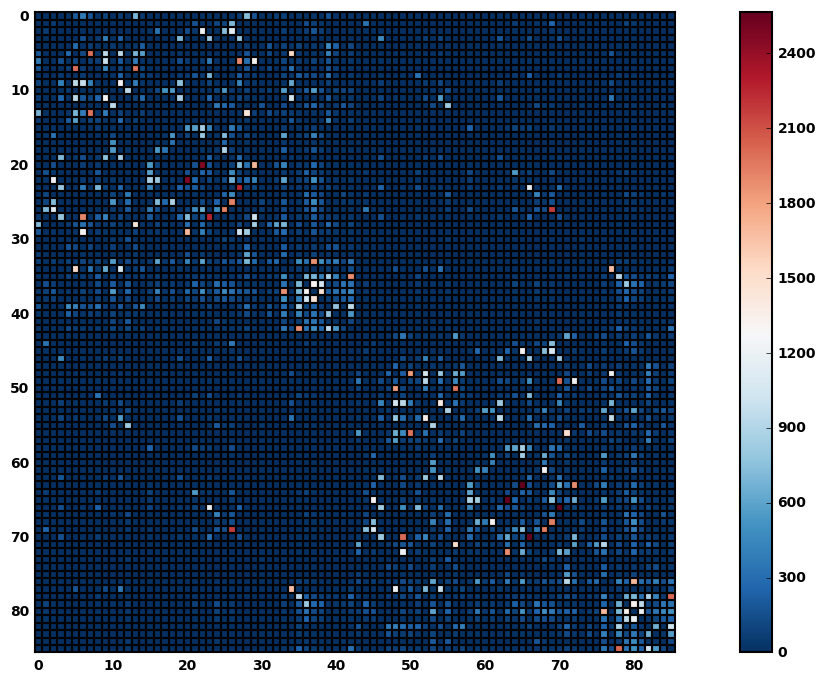

In [14]:
tw.imconnmat(X_mean)

# Nice, let's repeat using plotly
- first need to define `colorscale` containing list of rgb values
- I'll choose `seismic` colormap from mpl (see http://matplotlib.org/examples/color/colormaps_reference.html for a full list)
- below, I borrowed the idea from http://thomas-cokelaer.info/blog/2014/09/about-matplotlib-colormap-and-how-to-get-rgb-values-of-the-map/

In [15]:
from matplotlib import cm

In [25]:
# convert to plotly readable form, which requires list containing paired values:
# (1) value interpolating from decimal value 0 to 1
# (2) corresponding rgb hex value
cscale = cm.seismic
my_cscale = []
for i in xrange(256):
    r,g,b = cscale(i)[:3]
    my_cscale.append([i/255., '#%02x%02x%02x' %  (int(r*255+0.5), int(g*255+0.5), int(b*255+0.5))])

In [26]:
from pprint import pprint
pprint(my_cscale[:5])
print '...'
pprint(my_cscale[-5:])

[[0.0, '#00004d'],
 [0.00392156862745098, '#00004f'],
 [0.00784313725490196, '#000052'],
 [0.011764705882352941, '#000055'],
 [0.01568627450980392, '#000058']]
...
[[0.984313725490196, '#880000'],
 [0.9882352941176471, '#860000'],
 [0.9921568627450981, '#840000'],
 [0.996078431372549, '#820000'],
 [1.0, '#800000']]


## Create plotly `trace` object


In [30]:
data = [go.Heatmap(
    z = X_mean,
)]

In [32]:
py.iplot(data)

# Bunch of layout objects
for personal reference

In [73]:
layout = go.Layout(
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        autotick=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    showlegend=False,
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    hovermode='closest',    
)

## Nice, but we can do better by defining a `layout` object

In [33]:
df_nodes = tw.get_node_info86()

In [35]:
df_nodes.head()

,label,name_full,lobes,name_short,system,name_short_h1,name_short_h2,x,y,z,hemisphere,xmni,ymni,zmni
0,1001,ctx-lh-bankssts,L temporal,Bank of the Superior Temporal Sulcus,auditory,L-Bank of the Superior Temporal Sulcus,Bank of the Superior Temporal Sulcus-L,178,158,83,L,-54.15,-45.20,9.35
1,1002,ctx-lh-caudalanteriorcingulate,L frontal,Caudal Anterior Cingulate,cingulo-opercular,L-Caudal Anterior Cingulate,Caudal Anterior Cingulate-L,130,91,102,L,-4.35,17.15,29.15
2,1003,ctx-lh-caudalmiddlefrontal,L frontal,Caudal Middle Frontal,fronto-parietal,L-Caudal Middle Frontal,Caudal Middle Frontal-L,158,101,121,L,-36.45,10.20,47.45
3,1005,ctx-lh-cuneus,L occipital,Cuneus,visual,L-Cuneus,Cuneus-L,134,192,86,L,-5.55,-83.75,18.40
4,1006,ctx-lh-entorhinal,L temporal,Entorhinal,visual,L-Entorhinal,Entorhinal-L,150,116,41,L,-23.85,-5.90,-31.95


In [167]:
trace = go.Heatmap(
    z = X_mean,
        x = df_nodes['name_full'],
        y = df_nodes['name_full'],
    colorscale=my_cscale,
)
data = [trace] # can define multiple trace...not necessary for this example

# define my own layout
layout = go.Layout(
    title='Mean structural connectivity',
    titlefont = dict(size=37, color='black'),
    xaxis = dict(ticks='',range=[0,85],nticks=X_mean.shape[1], title='node',gridcolor='green',
                 linecolor='green',showline=True,showgrid=True,
                 titlefont=dict(size=32),
                 tickfont=dict(size=8),
                 categoryarray=df_nodes['system'],
                ),
    #yaxis = dict(ticks='',nticks=X_mean.shape[0], title='node'),
    yaxis = dict(ticks='',title='node',
                 #autorange='reversed', # rather use range
                 range=[85,0], nticks=86,
                 rangeselector = dict(yanchor='middle'),
                 tickfont=dict(size=9),                 
                 categoryarray=df_nodes['system'],
            ),
    scene = dict(aspectmode="manual",aspectratio=dict(x=1,y=1)),
    autosize=False,
    # sadly, no directly way to preserve aspect ratio...
    # https://github.com/plotly/plotly.py/issues/70
    # So just stick with static size for now...
    width=1000,
    height=1000,
)
# py.iplot([trace])

#bummer...gridlines over heatmap not supported...
#http://community.plot.ly/t/gridlines-over-heatmap/970

fig = go.Figure(data=data, layout=layout)

In [168]:
py.iplot(fig)

## Try again

In [185]:
trace = go.Heatmap(
    z = X_mean,
    x = df_nodes['name_full'],
    y = df_nodes['name_full'],
    hoverinfo=dict(flags = ['x','y','z','text','name']),
    colorscale=my_cscale,
)
data = [trace] # can define multiple trace...not necessary for this example

# define my own layout
layout = go.Layout(
    title='Mean structural connectivity',
    titlefont = dict(size=37, color='black'),
    xaxis = dict(ticks='',range=[0,85],nticks=X_mean.shape[1], 
                 #title='node',
                 #gridcolor='green',
                 #linecolor='green',showline=True,showgrid=True,
                 #titlefont=dict(size=32),
                 tickfont=dict(size=8),
                 categoryarray=df_nodes['system'],
                ),
    #yaxis = dict(ticks='',nticks=X_mean.shape[0], title='node'),
    yaxis = dict(ticks='',
                 #title='node',
                 #autorange='reversed', # rather use range
                 range=[85,0], nticks=86,
                 #rangeselector = dict(yanchor='middle'),
                 tickfont=dict(size=9),
                 categoryarray=df_nodes['system'],
            ),
    width=1000,
    height=1000,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='conn/pnc-mean')